## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. Cells in which "# YOUR CODE HERE" is found are the cells where your graded code should be written.
2. In order to test out or debug your code you may also create notebook cells or edit existing notebook cells other than "# YOUR CODE HERE". We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Case Study: Bayesian classifier

In this two-part case study you will:
1. Build, train, and test a Bayesian classifier. This will increase your understanding of parametric models for supervised learning.
2. Implement a Bayesian classifier model as Python class, in a manner similar to those of scikit-learn. This will improve you understanding of what goes on under the hood of scikit-learn models.
3. Evaluate performance of your Bayesian classifer.
4. Repeat this process, but build a Foolish classifer rather than a Bayesian classifier, then compare performance of a Foolish classifier to a Bayesian classifier. This will alert you to the sometimes misleadingly high performance scores a model might give, even when it has not learned any relationship between features and targets.

## Part 2 - Comparing a "Foolish" classifier to a Bayesian classifier

### In this notebook you will build a foolish classifier--one which only learns from the targets/labels, but not the from features. You'll then compare evaluation results with those of a scikit-learn Naive Bayesian classifier.

### Grading

50 points total

1. 10 pts - `fit` method
2. 10 pts - `predict` and `fit_predict` methods
3. 5 pts - Training models and making test set predictions for 4 classifiers
4. 5 pts - `my_accuracy_score` function
5. 15 pts - `my_confusion_matrix` function
6. 5 pts - Using scikit-learn to get F-scores

## The Gaussian Naive Bayes classifer

In Part 1 of this study, you created a Bayes classifier that modeled the distributions of features as 2D Gaussian distributions, but ones constrained to having a diagonal covariance matrix--that is, Gaussian shapes like in the image below, having no "diagonal" aspect to the elliptical shape of the distribution.

| ![A 2D Gaussian distribution with diagonal covariance matrix, fitted to noisy data.](./2d_noisy_gaussian.png) |
|:--:|
| A 2D Gaussian distribution with diagonal covariance matrix, fitted to noisy data. |

Hopefully you learned a lot by taking on that challenging task! In this notebook you'll train a much dumber, Foolish Classifier, and while it'd be nice to compare its results to those of your Bayes Classifier, we want to be 100% certain that the Bayes Classifier is implemented without error, so we'll use scikit-learn's Gaussian Naive Bayes classifier instead. Performance of the Naive Bayes classifier (for the feature distributions we're assuming and using) is nearly as good as that of our Bayes classifier.

Recall that a Naive Bayes classifier assumes that the individual features of our multivariate feature distribution are independent.

$$P(x_1,x_2|y)=P(x_1|y)P(x_2|y)$$

In Part 1, our $P(x_1,x_2|y)$ was:

$$ P(x_1,x_2|y)=\frac{ exp\Big(-(\frac{{(x_1-\mu_{y,1})}^2}{\sigma_{y,1}^2} + \frac{{(x_2-\mu_{y,2})}^2}{\sigma_{y,2}^2}) /2\Big) }{2\pi\sigma_{y,1}\sigma_{y,2}}  $$

But under the Naive Bayes (false) independence assumption, the probability equation becomes:

$$ P(x_1,x_2|y)=P(x_1|y)P(x_2|y)=\frac{ exp\Big(-\frac{{(x_1-\mu_{y,1})}^2}{\sigma_{y,1}^2}\Big)exp\Big(-\frac{{(x_2-\mu_{y,2})}^2}{\sigma_{y,2}^2}\Big)}{2\pi\sigma_{y,1}\sigma_{y,2}} $$

If we were to plot this distribution, you'd see one that has a slightly more rectangular shape, when compared to the elliptical shape of the figure above.

The feature independence assumption makes it much easier to estimate the parameters of the probability distribution even when there are many features and limited data. After your experience in Part 1, you could likely implement the naive distribution quite easily, with only minor changes to your BayesClassifier code, __but we'll use the scikit-learn Gaussian Naive Bayes classifier to ensure that it's correct__.

## The Foolish classifier

In this notebook you'll implement a foolish classifier. It's foolish because although the user passes both features and labels (targets) to it for training, the classifier completely ignores the features. In effect, it only estimates the prior distribution of the classes, $P(y)$, and even that it sometimes does poorly.

__Why are we having you do this?__ As you'll see from the evaluation scores of the Foolish classifier and the Naive Bayes classifier, some evaluation metrics can give surprisingly high scores for such a foolish approach. If you use just one or two evaluation metrics alone, you might be deceived into thinking that the foolish classifier is quite wise! But in fact, you'll know that it's really just "guessing" as to what the true labels are, not predicting based upon informative features. If you were to employ such a classifier, it'd eventually be discovered and hopefully you'd be fired. :)

You'll implement a foolish classifier that has __three levels of foolishness__, one of which can be selected by the user when instantiating the class object:
1. __Uniform__: P(y) is a uniform distribution. That is, aside from knowing the number of classes, it doesn't even learn from the targets themselves. It just assumes that all classes are equally likely.
2. __Mode__: P(y) has probability of 1 for the class that occurs most often in the training labels, and 0 for all other classes. It predicts the "mode" of the training labels--the prediction never changes, it is always the same class.
3. __Proportional__: P(y) probabilities are proportional to the frequency of labels in the training data. This is exactly how you were instructed to estimate the priors of the Bayes Classifier of Part 1. For example, if classes 0, 1, and 2, have 5, 10, and 35 samples, respectively, then the P(y) foolish classifier's priors for those classes will be 5/50, 10/50, and 35/50 (0.1, 0.2, and 0.7).

They're all foolish, but __which do you think will score most highly__ on evaluation metrics applied to the test set? Or to the training set, for that matter, since the classifier doesn't even use the features of the training set for any learning. __Ponder this for a moment before you dive in!__

## The model's Python class

As in Part 1, you will create a Python class from scratch (aside from the skeleton we have provided) that will implement three methods that are part of most scikit-learn model classes:

`fit(X, y)` - Trains the model using features, X, and labels, y, and stores the learned (fitted) model parameters as class object attributes. __Except in this case the foolish classifier will take in feature and labels, but then completely ignore the features.__

`predict(X)` - Using the stored model parameters, predicts labels for features, X, and returns them. __But again, in this case, those predictions will not utilize the information of the features at all. The model will effectively be guessing.__

`fit_predict(X, y)` - Sequentially performs the actions of `fit()` and `predict()`.

Refer back to Part 1 if you need to. Here, we'll just instruct you on aspects that are specific to what we'll name the `FoolishClassifier` class. In addition to the `n_classes` argument that your `BayesClassifier`'s `__init__`method took, the `FoolishClassifier` will also need a `prior_distribution` argument. The `prior_distribution` argument should be one of three strings:

 - __`'uniform'`__: Your `fit` method literally does nothing. When your model makes predictions, it just makes a completely random guess, with equal probability for each class.
 - __`'mode'`__: Your `fit` method will determine the most frequent class of the labels, store it, and all its predictions will be of that class.
 - __`'proportional'`__: Your `fit` method's estimates of class prior probabilities are simply the fractional frequency of class occurances of the `labels` it is given, just as in Part 1 of the case study. For `predict` your model will randomly draw/sample from a distribution that has those priors (we'll guide you on how to do that).

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

%matplotlib inline
plt.style.use("ggplot")

## FoolishClassifier.fit method

You are welcome to implement all the methods at once. However, we've created test cells and visualizations and/or printouts that will guide you first through the testing of your `fit` method, then followed by ones for your `predict` method. So you may want to first work solely on `fit`, until you pass the test cell that follows. Then work on `predict` until is passes the subsequent test cell.

Guidance on implementing `fit` is in the comments in the skeleton class below. Go for it!

__You should use `numpy.random.choice()` to help with your `predict` method__. See guidance in a cell further below for more info, before coding your `predict`. Do not use other methods, e.g., `random.uniform()` or `numpy.random.uniform`, for making random predictions. Other methods would be fine, generally, but you'll need to use `choice` in order to pass the assert statements.

In [2]:
## Implement the three methods of your Foolish classifier.

class FoolishClassifier():
    def __init__(self, prior_distribution, n_classes):
        # Store the type of prior distribtion and number of
        # classes as class attributes.
        assert prior_distribution in ['uniform', 'mode', 'proportional']
        self.prior_distribution = prior_distribution
        self.n_classes = n_classes
        # You may initialize other variables here if you want to,
        # but it's not truly necessary. You can do that in .fit().

        # YOUR CODE HERE
        self.mode = None
        self.priors = []
                
        
    def fit(self, features, labels):
        # features - a numpy array of shape (n_samples, n_features)
        # labels - a numpy array of shape (n_samples,)
        #
        # This method does not return/output anything.
        
        # Use 'labels' to fit your model parameters. Ignore 'features' altogether!
        #
        # If 'prior_distribution' is:
        # 1. 'uniform' - Do nothing. There is no information in 'labels' that you need for predictions.
        #                Just exit the function via a 'pass' or empty 'return' statement.
        # 2. 'mode' - Determine which label/class occurs most frequently.
        #             ** Save that label, the mode, as "self.mode".
        # 3. 'proportional' - For each class, count the number of occurrances of
        #                     that class and divide by the total number of samples
        #                     to get the estimated prior for that class.
        #                     ** Save the priors in a list or numpy array named "self.priors",
        #                        ordering them by their class label (the prior for
        #                        class 0 is first, the prior for n_classes-1 is last).
        #
        # As a reminder, if you use the range() function to loop over
        # the class labels [0, 1, 2, ...] recall that range() excludes the
        # value of the argument you give it. That is, range(4) will iterate
        # over 0, 1, 2, and 3. It will exclude 4.
        
        # YOUR CODE HERE
        # Colab doesn't support match-case statements RIP :<
        if self.prior_distribution == 'uniform':
          return
        else:
          # Unsure if we can use scipy for mode, but this actually makes calculating priors easier.
          val, counts = np.unique(labels, return_counts=True)
          if self.prior_distribution == 'mode':
            self.mode = val[np.argmax(counts)]
            return 
          elif self.prior_distribution == 'proportional':
            for class_idx in range(self.n_classes):
              self.priors.append(counts[class_idx]/len(labels))
            return
          else:
            throw('Code made it here in error.')


        
    def predict(self, features):
        # features - a numpy array of shape (n_samples, n_features)
        #
        # Returns an numpy array of predictions
        
        # Because the foolish classifier does not use features to make
        # predictions, the only piece of information you need to extract
        # from 'features' is the number of samples passed in, which is
        # the number predictions that need to be made and returned.
        #
        # If 'prior_distribution' is:
        # 1. 'uniform' - Draw predictions from a random distribution and
        #                return them. You may use numpy.random.choice()
        #                to help you.
        # 2. 'mode' - Return an array of length equal to that of
        #             the number of samples in 'features', with each
        #             element being your stored mode value, 'self.mode'.
        # 3. 'proportional' - Draw predictions from a probability distribution
        #                     with probabilities equal to those of your
        #                     stored 'self.priors'. You may use numpy.random.choice()
        #                     to help you.
        
        # YOUR CODE HERE
        rows, cols = np.shape(features)
        if self.prior_distribution == 'uniform':
          predictions = np.random.choice(self.n_classes, rows)
          return predictions
        elif self.prior_distribution == 'mode':
          predictions = np.full(rows, self.mode)
          return predictions
        elif self.prior_distribution == 'proportional':
          predictions = np.random.choice(self.n_classes, rows, p=self.priors)
          return predictions 
        else:
          throw('Code made it here in error.')
        
        
    def fit_predict(self, features, labels):
        # features - a numpy array of shape (n_samples, n_features==2)
        # labels - a numpy array of shape (n_samples,)
        #
        # Returns an array of predictions
        
        # Fit your model by calling self.fit(features, labels)
        # Then make predictions by calling self.predict(features)
        # Finally, return those predictions.
        
        # YOUR CODE HERE
        self.fit(features, labels)
        return self.predict(features)

The cell below does a coarse check of your implementation of the FoolishClassifier's fit `method`. It may not give you much meaningful feedback to help you debug your code.

To help with debugging, don't hesistate to:
1. Put print statements in your code above, to show you the contents of variables and ensure they hold the values you expect. Also print out helpful info such as a variables type (e.g., are you sure it's a numpy array? Or is it a list?... `print(type(my_variable))`, shape: `print(my_variable.shape)`, and length: `print(len(my_variable))`. Note that the output of the print statements will appear below the cell in which your classifier is instantiated, or in which one of its methods is called. It will not appear under the cell in which the class is defined (above).
2. Create a new cell below, and create simple data you can use to test your classifier (as in the autograder cell below).
3. If you instantiate your class, you can then view its attributes and their values as shown below:
```python
# Create object
clf = FoolishClassifier('proportional', n_classes=4)
# print out the names of its attributes
print(clf.__dict__.keys())
# If an attribute is named "self.priors" you can print out its values...
print(clf.priors)
```
Keep in mind that depending on how you implemented your class, some attributes may not exist until the `fit()` method is called.

In [3]:
# Autograder: Test FoolishClassifier.fit()
np.random.seed(42)
n_classes = 4
y = np.random.choice(n_classes, size=1000)
X = None

# Test 'uniform'
clf = FoolishClassifier('uniform', n_classes)
clf.fit(X, y)

# Test 'mode'
clf = FoolishClassifier('mode', n_classes)
clf.fit(X, y)
print(clf.mode)
assert clf.mode==3

# Test 'proportional'
clf = FoolishClassifier('proportional', n_classes)
clf.fit(X, y)
print(clf.priors)
assert np.all(np.isclose(clf.priors, [0.258, 0.23, 0.232, 0.28]))

3
[0.258, 0.23, 0.232, 0.28]


## FoolishClassifier.predict and fit_predict methods

If you didn't implement `predict` and `fit_predict` already, now is the time to do so. The methods will be tested in the test cell below. Guidance is provided in the comments in the class skeleton.

__You should use `numpy.random.choice()` to help with your `predict` method__. The function draws sample from a discrete probability function that you define. Read the [numpy.random.choice documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) carefully. Because we want each sample to be independently chosen/sampled/drawn, what is the correct setting for the `replace` argument?

For those with greater math and programming skills, you may want to challenge yourself... Think about how you would implement `predict` if `numpy.random.choice` was not available, and you only had a uniform random number generator (random floating-point numbers between 0 and 1) available to you. (Don't actually use such an implementation, however, since you will almost certainly fail the assert statements if you do, since they rely on the known results from `numpy.random`, with the seed it is given.)

In [4]:
# Autograder: Test FoolishClassifier.predict() and fit_predict()
np.random.seed(42)
n_classes = 4
y = np.array([0]*100 + [1]*200 + [2]*300 + [3]*400)
np.random.shuffle(y)
X = np.zeros((1000, 10))

# Test 'uniform'
clf = FoolishClassifier('uniform', n_classes)
clf.fit(X, y)
predictions = clf.predict(X)
label, counts = np.unique(predictions, return_counts=True)
print(counts)
assert np.array_equal(counts, [267, 248, 257, 228])

# Test 'mode'
clf = FoolishClassifier('mode', n_classes)
clf.fit(X, y)
predictions = clf.predict(X)
label, counts = np.unique(predictions, return_counts=True)
assert label[0]==clf.mode
print(counts)
assert np.array_equal(counts, [1000])

# Test 'proportional'
clf = FoolishClassifier('proportional', n_classes)
clf.fit(X, y)
predictions = clf.predict(X)
label, counts = np.unique(predictions, return_counts=True)
print(counts)
assert np.array_equal(counts, [103, 194, 287, 416])

# Test fit_predict
clf = FoolishClassifier('mode', n_classes)
predictions = clf.fit_predict(X, y)
label, counts = np.unique(predictions, return_counts=True)
assert label[0]==clf.mode
print(counts)
assert np.array_equal(counts, [1000])

[267 248 257 228]
[1000]
[103 194 287 416]
[1000]


## Testing and visualization

We'll create a synthetic data set, as we did last time, then you'll train four models on the train split, and make predictions on the test set split. Then we'll plot those predictions. The four models you'll train and test will be:
1. Gaussian Naive Bayes
2. FoolishClassifier with uniform distribution
3. FoolishClassifier with mode distribution
4. FoolishClassifier with proportional distribution

The Gaussian Naive Bayes class, [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) was imported for you at that beginning of the notebook.

In [5]:
# Create random samples of three classes, with samples drawn from multivariate Gaussian distributions
np.random.seed(100)
n1 = 80
mean1 = [1.5, 3]
cov1 = [[0.5, 0], [0, 0.5]]
n2 = 10
mean2 = [3, 2]
cov2 = [[0.1, 0], [0, 1]]
n3 = 10
mean3 = [0, 1]
cov3 = [[1, 0], [0, 1]]
features = [np.random.multivariate_normal(mean1, cov1, size=n1),
            np.random.multivariate_normal(mean2, cov2, size=n2),
            np.random.multivariate_normal(mean3, cov3, size=n3),
           ]
features = np.concatenate(features, axis=0)
labels = np.array([0]*n1 + [1]*n2 + [2]*n3)

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=100, test_size=0.5)

In [6]:
# In this cell, instantiate the four models. Your FoolishClassifier
# models should be instantiated with n_classes=3.
#
# Train your models using training features, X_train, and labels, y_train.
# Then, predict the test set labels using X_test. Save your predictions
# to variables with the following names:
#    pred_nb, pred_uniform, pred_mode, pred_proportional

n_classes = 3

# YOUR CODE HERE
# Four models. 
NBC = GaussianNB()
F_uniform = FoolishClassifier('uniform', n_classes)
F_mode = FoolishClassifier('mode', n_classes)
F_proportional = FoolishClassifier('proportional', n_classes)
# Fit them all 
NBC.fit(X_train, y_train)
F_uniform.fit(X_train, y_train)
F_mode.fit(X_train, y_train)
F_proportional.fit(X_train, y_train)
# Predictions
pred_nb = NBC.predict(X_test)
pred_uniform = F_uniform.predict(X_test)
pred_mode = F_mode.predict(X_test)
pred_proportional = F_proportional.predict(X_test)

We'll plot your results for you in the cell below. Do they look plausible to you, given what each model is doing? In the subsequent cell we'll test your predictions with some `assert` statements.

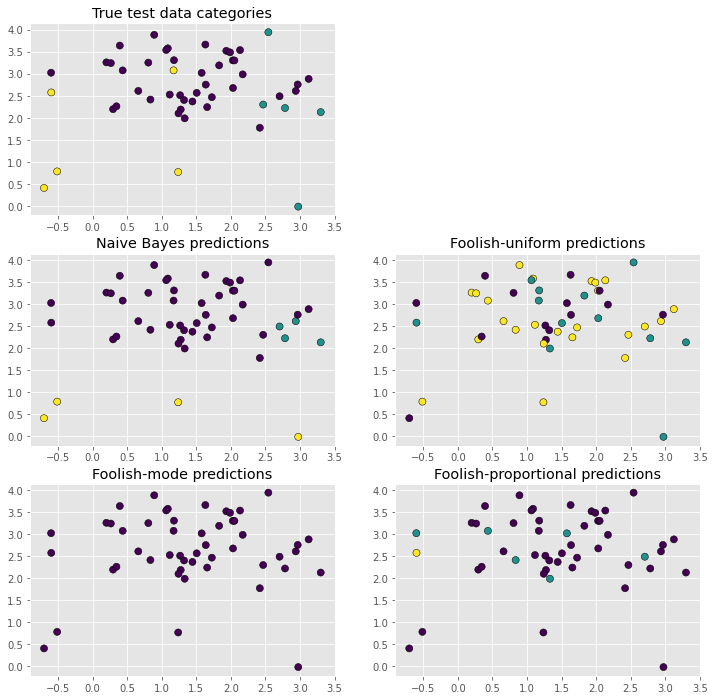

In [7]:
plt.figure(figsize=(12, 12))
plt.clf()

plt.subplot(3, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=50, edgecolor='k')
plt.title('True test data categories')

plt.subplot(3, 2, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=pred_nb, s=50, edgecolor='k')
plt.title('Naive Bayes predictions')

plt.subplot(3, 2, 4)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=pred_uniform, s=50, edgecolor='k')
plt.title('Foolish-uniform predictions')

plt.subplot(3, 2, 5)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=pred_mode, s=50, edgecolor='k')
plt.title('Foolish-mode predictions')

plt.subplot(3, 2, 6)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=pred_proportional, s=50, edgecolor='k')
_ = plt.title('Foolish-proportional predictions')

In [8]:
# Autograder: Test predictions of all classifiers, assuring
# they match the expected results (which may or may not be
# the true classes/labels).

n_correct_nb = np.sum(y_test==pred_nb)
print(n_correct_nb)
assert n_correct_nb==43

n_correct_uniform = np.sum(y_test==pred_uniform)
print(n_correct_uniform)
assert n_correct_uniform==19 or n_correct_uniform==14

n_correct_mode = np.sum(y_test==pred_mode)
print(n_correct_mode)
assert n_correct_mode==40

n_correct_proportional = np.sum(y_test==pred_proportional)
print(n_correct_proportional)
assert n_correct_proportional==35 or n_correct_proportional==33

43
19
40
35


## Evaluation

As in Part 1, we'll use the following to help us evaluate model performance:
- Accuracy scores
- Confusion matrices
- Precision, Recall, and F-scores

You have three more coding tasks... (1) implementing your own function for computing accuracy, (2) implementing your own function for computing a confusion matrix, and (3) using scikit-learn to compute F-scores. You may not use scikit-learn for 1 and 2 (though you may want to use the scikit-learn version during development, to make sure your results match those of scikit-learn).

We'll start off with the accuracy function.

### Accuracy score

In [9]:
# Implement your accuracy function.
# You may not use scikit-learn in your implementation.
def my_accuracy_score(y_true, y_pred):
    # y_true: An iterable of true label values.
    # y_pred: An iterable of predicted label values.
    #
    # Returns the fraction of predicted label values that match the true label values,
    # a number between 0 and 1.
    # YOUR CODE HERE
    correct_pred = 0
    for true, pred in zip(y_true, y_pred):
      if true == pred:
        correct_pred += 1
    return correct_pred / len(y_true)


Let's see how accurate the models are, and test your code to make sure the accuracy scores are correct.

In [10]:
acc_nb = my_accuracy_score(y_test, pred_nb)
acc_uniform = my_accuracy_score(y_test, pred_uniform)
acc_mode = my_accuracy_score(y_test, pred_mode)
acc_proportional = my_accuracy_score(y_test, pred_proportional)

print(f'Naive Bayes accuracy:          {acc_nb:0.3f}')
print(f'Foolish-uniform accuracy:      {acc_uniform:0.3f}')
print(f'Foolish-mode accuracy:         {acc_mode:0.3f}')
print(f'Foolish-proportional accuracy: {acc_proportional:0.3f}')

Naive Bayes accuracy:          0.860
Foolish-uniform accuracy:      0.380
Foolish-mode accuracy:         0.800
Foolish-proportional accuracy: 0.700


In [11]:
# Autograder: Confirm that accuracy scores were computed correctly
assert np.isclose(acc_nb, 0.86)
assert np.isclose(acc_uniform, 0.38) or np.isclose(acc_uniform, 0.28)
assert np.isclose(acc_mode, 0.80)
assert np.isclose(acc_proportional, 0.70) or np.isclose(acc_proportional, 0.66)

Take a look at the accuracy scores, and at the scatter plots of predictions (several cells above). Do they make sense?

The Foolish classifier is very foolish. It doesn't use the features at all when making its predictions. __Yet, the accuracy scores of the 'mode' classifier and the 'proportional' classifier are almost as high as that of the Naive Bayes model!__ Ask yourself why that is, and if it isn't clear be sure to ask the instructional team about it.

At this point it is hopefully evident that accuracy is sometimes a poor metric for evaluating a model's performance.

Let's move on to your confusion matrix function.

### Confusion matrices

In [12]:
# Implement your confusion matrix function.
# You may not use scikit-learn in your implementation.
def my_confusion_matrix(y_true, y_pred, n_classes):
    # y_true: An iterable of true label values.
    # y_pred: An iterable of predicted label values.
    # n_classes: The number of classes. User-provided labels in y_true and
    #            y_pred must be values from 0 to n_classes-1.
    #
    # Returns a confusion matrix numpy array of shape (n_classes, n_classes).
    #   For row i, column j, the confusion matrix contains the number of
    #   samples that had true label i, and predicted label j.
    
    # Guidance:
    # There are many ways to do this, but here is one approach:
    # 1. Initialize a confusion matrix with all zeros, using numpy.zeros().
    # 2. Use a for loop to loop over the rows (true classes)
    # 3. Within that loop, use a for loop to loop over the columns (predicted classes)
    # 4. Using the row and column loop counters, examine each sample in
    #    y_true and y_pred and see if they are of the class for that row
    #    and column. If so, add 1 to the confusion matrix at that row and column.
    
    # YOUR CODE HERE
    # pandas can do this by crosstab() but I thought thats a bit disingenuous.
    # init matrix of 0s 
    conf_matrix = np.zeros((n_classes, n_classes))
    for i in range(len(y_pred)):
      # the class is the value given by each of the arrays, such that we increment that location in matrix
      conf_matrix[y_true[i]][y_pred[i]] += 1
    return conf_matrix

Let's look at the confusion matrices produced by your function, and test your code to make sure they are correct.

__Recall that a good model will produce a confusion matrix that has larger values along the diagonal and smaller (ideally 0) values off the diagonal.__

In [13]:
cm_nb = my_confusion_matrix(y_test, pred_nb, n_classes)
cm_uniform = my_confusion_matrix(y_test, pred_uniform, n_classes)
cm_mode = my_confusion_matrix(y_test, pred_mode, n_classes)
cm_proportional = my_confusion_matrix(y_test, pred_proportional, n_classes)

print('Naive Bayes')
print(cm_nb)

print('\nFoolish-uniform')
print(cm_uniform)

print('\nFoolish-mode')
print(cm_mode)

print('\nFoolish-proportional')
print(cm_proportional)

Naive Bayes
[[38.  2.  0.]
 [ 2.  2.  1.]
 [ 2.  0.  3.]]

Foolish-uniform
[[13.  6. 21.]
 [ 0.  4.  1.]
 [ 1.  2.  2.]]

Foolish-mode
[[40.  0.  0.]
 [ 5.  0.  0.]
 [ 5.  0.  0.]]

Foolish-proportional
[[34.  6.  0.]
 [ 5.  0.  0.]
 [ 4.  0.  1.]]


In [14]:
# Autograder: Confirm that confusion scores were computed correctly
assert int(cm_nb[0, 0])==38
assert int(cm_uniform[2, 2])==2
assert int(cm_mode[1, 0])==5
assert int(cm_proportional[0, 1])==6

Review the confusion matrices. __Can you see how they are more informative than accuracy scores, and indicate what types of errors the classifiers are making?__

The Foolish-mode confusion matrix has all zeros in columns 1 and 2, making it clear that the classifier __never__ predicts a sample to be of class 1 and 2. Bad news! And while the Foolish-proportional classifier sometimes predicts a sample to be of class 1 and 2, those predictions are usually incorrect. Finally, we see that the Foolish-uniform classifier is often predicting true samples of class 0 to be of class 1 or 2 (the off-diagonal counts in the top row).

Now that you've observed how informative a confusion matrix is, we'll have you look at precision, recall, and F-score. You can use the scikit-learn [precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) function rather than building your own.

### Precision, Recall, and F-score

You may want to review what precision, recall, and F-score are by reading the header of the scikit-learn documentation (see link above). In short...

- __Precision__ measures how often a sample predicted to be of class i is truly of class i.
- __Recall__ measures how often a sample that is __not__ of class i is correctly predicted to be __not__ of class i.
- __F-score__ is the harmonic mean of precision and recall: (2 x precision x recall) / (precision + recall). This means that if either precision or recall are low, then f-score will be low. __F-score is a very effective metric for model performance on multiclass classification tasks.__

Note that precision, recall, and F-score are computed for each class, so you'll get three values for each, for each classifier. __To prevent the analysis for getting to messy, we'll ask that you only save the three f-scores for each classifier, and examine them.__ You may of course save and print out the precision and recall scores as well, for your own independent observation.

You will get an `UndefinedMetricWarning` which indicates that a particular class/label was never predicted (e.g., by the Foolish-mode classifier) and thus division by zero would occur in the computations. You should read the warning, but its presence is expected and of no concern.

In [15]:
# Use scikit-learn to compute the fscore for each of your classifiers.
# Save results to variables named: fscore_nb, fscore_uniform,
# fscore_mode, and fscore_proportional.

# YOUR CODE HERE
prec, rec, fscore_nb, dummy = precision_recall_fscore_support(y_test, pred_nb)
prec, rec, fscore_uniform, dummy = precision_recall_fscore_support(y_test, pred_uniform)
prec, rec, fscore_mode, dummy = precision_recall_fscore_support(y_test, pred_mode)
prec, rec, fscore_proportional, dummy = precision_recall_fscore_support(y_test, pred_proportional)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Finally, let's observe your F-scores, and make sure they are correct.

In [16]:
print('Naive Bayes')
print(fscore_nb)

print('\nFoolish-uniform')
print(fscore_uniform)

print('\nFoolish-mode')
print(fscore_mode)

print('\nFoolish-proportional')
print(fscore_proportional)

Naive Bayes
[0.92682927 0.44444444 0.66666667]

Foolish-uniform
[0.48148148 0.47058824 0.13793103]

Foolish-mode
[0.88888889 0.         0.        ]

Foolish-proportional
[0.81927711 0.         0.33333333]


In [17]:
# Autograder: Test the F-scores for correctness
assert np.isclose(fscore_nb[0], 0.92682927)
assert np.isclose(fscore_uniform[1], 0.47058824) or np.isclose(fscore_uniform[1], 0.09090909)
assert np.isclose(fscore_mode[0], 0.88888889)
assert np.isclose(fscore_proportional[2], 0.33333333) or np.isclose(fscore_proportional[2], 0.)

__Note that based on F-score, all three Foolish classifiers performed much worse than the Naive Bayes classifier__, when one takes into consideration the individual scores for each class. If one wanted to, taking the average F-score across all three classes would provide a meaningfull __scalar-valued__ metric of overall model performance.

## You're done with Case Study 2!

__Hopefully you now have a much better understanding of ML models, including implementation, fitting/training, predicting, and ways of evaluating performance (without being fooled by high scores on the more simplistic evaluation metrics).__

## Feedback

In [18]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return ('N/A, thanks')